In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [35]:
# create a num ranked column
df = pd.read_csv('data/clean.csv')
df['ranking'] = df['ranking'].str.replace('nan', '')
df['ranking'] = df['ranking'].str.replace(',,', '')
df['num_ranked'] = 0
for i in range(len(df['ranking'])):
    df['num_ranked'][i] = len(df['ranking'][i].split(','))
df['num_ranked'] = (df['num_ranked'] - 1) // 2
df.head()


/var/folders/kg/hnwkrhks4jl7n3g4wwgnwt1h0000gn/T/ipykernel_61734/1572767575.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_ranked'][i] = len(df['ranking'][i].split(','))


,Timestamp,id,major_status,taken_courses,grad_semester,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,...,ranking_11,ranking_12,ranking_13,ranking_14,desired_amount_of_courses,percieved_amount_of_courses_needed,ranking_15,ranking_16,ranking,num_ranked
0,10/29/2023 18:04:33,0,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 211...",Spring 2025,"303-1, DATABASE SYSTEMS","428-1, GENERATIVE DATA MODELING","315-1, COMPUTER NETWORKS","214-1, WEB TECH (TBD)","310-1, ROBOTICS",...,NaN,NaN,NaN,NaN,3,2,NaN,NaN,"303-1, DATABASE SYSTEMS,428-1, GENERATIVE DATA...",5
1,10/30/2023 14:54:36,1,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 205...",Spring 2025,"304-1, ALGORITHMS","302-1, OBJECT-ORIENTED SOFTWARE DESIGN","315-1, COMPUTER NETWORKS","214-1, WEB TECH (TBD)","496-1, RESEARCH SEMINAR",...,NaN,NaN,NaN,NaN,4,3,NaN,NaN,"304-1, ALGORITHMS,302-1, OBJECT-ORIENTED SOFTW...",7
2,10/31/2023 13:53:58,2,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 212...",Spring 2025,"313-1, ALGORITHMIC GAME THEORY","302-1, OBJECT-ORIENTED SOFTWARE DESIGN","214-1, WEB TECH","303-1, DATABASE SYSTEMS","315-1, COMPUTER NETWORKS",...,NaN,NaN,NaN,NaN,3,2,NaN,NaN,"313-1, ALGORITHMIC GAME THEORY,302-1, OBJECT-O...",5
3,11/1/2023 12:36:27,3,intended CS major,COM 110 CC:INTRO COMP SCI & PROB SOLV,Spring 2027,"212-2, DATA STRUCTURES","212-1, DATA STRUCTURES",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,1,NaN,NaN,"212-2, DATA STRUCTURES,212-1, DATA STRUCTURES",1
4,10/23/2023 14:02:40,4,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 212...",Spring 2025,"219-1, COMPUTER ORGANIZATION","304-1, ALGORITHMS","302-1, OBJECT-ORIENTED SOFTWARE DESIGN","303-1, DATABASE SYSTEMS","310-1, ROBOTICS",...,"214-1, WEB TECH (TBD)",NaN,NaN,NaN,3,3,NaN,NaN,"219-1, COMPUTER ORGANIZATION,304-1, ALGORITHMS...",11


In [41]:
# add column for semesters remaining
df['semesters_remaining'] = 0
for i in range(len(df['grad_semester'])):
    remaining = 0
    remaining += (int(df['grad_semester'][i][-2:]) - 23) * 2
    if df['grad_semester'][i][0] == 'S':
        remaining -= 1
    df['semesters_remaining'][i] = remaining
df.head()

/var/folders/kg/hnwkrhks4jl7n3g4wwgnwt1h0000gn/T/ipykernel_61734/1877190239.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["semesters_remaining"][i] = remaining


,Timestamp,id,major_status,taken_courses,grad_semester,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,...,ranking_12,ranking_13,ranking_14,desired_amount_of_courses,percieved_amount_of_courses_needed,ranking_15,ranking_16,ranking,num_ranked,semesters_remaining
0,10/29/2023 18:04:33,0,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 211...",Spring 2025,"303-1, DATABASE SYSTEMS","428-1, GENERATIVE DATA MODELING","315-1, COMPUTER NETWORKS","214-1, WEB TECH (TBD)","310-1, ROBOTICS",...,NaN,NaN,NaN,3,2,NaN,NaN,"303-1, DATABASE SYSTEMS,428-1, GENERATIVE DATA...",5,3
1,10/30/2023 14:54:36,1,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 205...",Spring 2025,"304-1, ALGORITHMS","302-1, OBJECT-ORIENTED SOFTWARE DESIGN","315-1, COMPUTER NETWORKS","214-1, WEB TECH (TBD)","496-1, RESEARCH SEMINAR",...,NaN,NaN,NaN,4,3,NaN,NaN,"304-1, ALGORITHMS,302-1, OBJECT-ORIENTED SOFTW...",7,3
2,10/31/2023 13:53:58,2,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 212...",Spring 2025,"313-1, ALGORITHMIC GAME THEORY","302-1, OBJECT-ORIENTED SOFTWARE DESIGN","214-1, WEB TECH","303-1, DATABASE SYSTEMS","315-1, COMPUTER NETWORKS",...,NaN,NaN,NaN,3,2,NaN,NaN,"313-1, ALGORITHMIC GAME THEORY,302-1, OBJECT-O...",5,3
3,11/1/2023 12:36:27,3,intended CS major,COM 110 CC:INTRO COMP SCI & PROB SOLV,Spring 2027,"212-2, DATA STRUCTURES","212-1, DATA STRUCTURES",NaN,NaN,NaN,...,NaN,NaN,NaN,1,1,NaN,NaN,"212-2, DATA STRUCTURES,212-1, DATA STRUCTURES",1,7
4,10/23/2023 14:02:40,4,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 212...",Spring 2025,"219-1, COMPUTER ORGANIZATION","304-1, ALGORITHMS","302-1, OBJECT-ORIENTED SOFTWARE DESIGN","303-1, DATABASE SYSTEMS","310-1, ROBOTICS",...,NaN,NaN,NaN,3,3,NaN,NaN,"219-1, COMPUTER ORGANIZATION,304-1, ALGORITHMS...",11,3


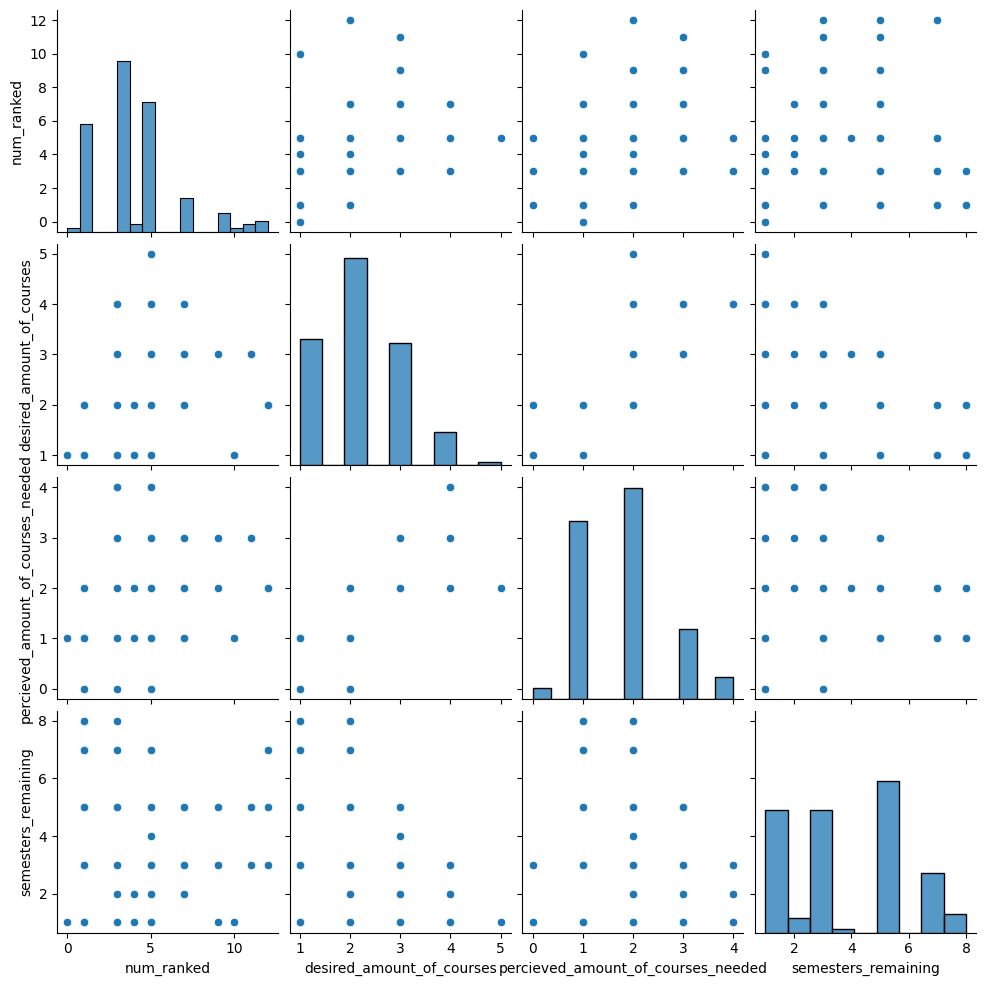

In [43]:
# pair wise plots for all numeric columns
sns.pairplot(
    df, 
    vars=[
        'num_ranked', 
        'desired_amount_of_courses', 
        'percieved_amount_of_courses_needed',
        'semesters_remaining'
        ], 
    )

In [45]:
# Pearson correlations between all numeric columns
pearson = df[[
    "desired_amount_of_courses",
    "percieved_amount_of_courses_needed",
    "num_ranked",
    "semesters_remaining"
    ]].corr(method='pearson')
pearson

,desired_amount_of_courses,percieved_amount_of_courses_needed,num_ranked,semesters_remaining
desired_amount_of_courses,1.000000,0.803352,0.404302,-0.383343
percieved_amount_of_courses_needed,0.803352,1.000000,0.414263,-0.263219
num_ranked,0.404302,0.414263,1.000000,-0.150625
semesters_remaining,-0.383343,-0.263219,-0.150625,1.000000


1
0
